In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('data_merged_39_countries_2011_2020.csv')
data.head()

,Unnamed: 0,country,occupation,year,income_ratio,country_group,equal_pay_law,score
0,0,Argentina,1. Managers,2011,0.674475,Upper middle income,Yes,1
1,1,Argentina,2. Professionals,2011,0.715035,Upper middle income,Yes,1
2,2,Argentina,3. Technicians and associate professionals,2011,0.812954,Upper middle income,Yes,1
3,3,Argentina,4. Clerical support workers,2011,0.823389,Upper middle income,Yes,1
4,4,Argentina,5. Service and sales workers,2011,0.691405,Upper middle income,Yes,1


In [3]:
data.shape

(734, 8)

In [4]:
data = data.iloc[:,1:]
data.head()

,country,occupation,year,income_ratio,country_group,equal_pay_law,score
0,Argentina,1. Managers,2011,0.674475,Upper middle income,Yes,1
1,Argentina,2. Professionals,2011,0.715035,Upper middle income,Yes,1
2,Argentina,3. Technicians and associate professionals,2011,0.812954,Upper middle income,Yes,1
3,Argentina,4. Clerical support workers,2011,0.823389,Upper middle income,Yes,1
4,Argentina,5. Service and sales workers,2011,0.691405,Upper middle income,Yes,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        734 non-null    object 
 1   occupation     734 non-null    object 
 2   year           734 non-null    int64  
 3   income_ratio   734 non-null    float64
 4   country_group  734 non-null    object 
 5   equal_pay_law  734 non-null    object 
 6   score          734 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 40.3+ KB


In [6]:
data.describe()

,year,income_ratio,score
count,734.000000,734.000000,734.000000
mean,2015.500000,0.786767,0.719346
std,4.503069,0.119055,0.449625
min,2011.000000,0.316861,0.000000
25%,2011.000000,0.703181,0.000000
50%,2015.500000,0.788069,1.000000
75%,2020.000000,0.856441,1.000000
max,2020.000000,1.406233,1.000000


In [7]:
data.isna().sum()

country          0
occupation       0
year             0
income_ratio     0
country_group    0
equal_pay_law    0
score            0
dtype: int64

In [8]:
# look at distribution of f/m income ratio (total, not by occupation) by year 

total = data[data['occupation']=='Total']
total.head()

,country,occupation,year,income_ratio,country_group,equal_pay_law,score
9,Argentina,Total,2011,0.746261,Upper middle income,Yes,1
20,Austria,Total,2011,0.615999,High income,Yes,1
29,Belgium,Total,2011,0.772988,High income,Yes,1
39,Bolivia,Total,2011,0.720533,Lower middle income,Yes,1
49,Bosnia and Herzegovina,Total,2011,0.898945,Upper middle income,Yes,1


In [9]:
total.shape

(78, 7)

In [10]:
total['country'].nunique()

39

In [13]:
# in general, did the gender gap get smaller between 2011 and 2020? 
# look at whether the average or mean gap changed 

gap_change = total.groupby('year')['income_ratio'].agg([np.mean, np.median]).reset_index()
gap_change

,year,mean,median
0,2011,0.792466,0.781325
1,2020,0.826800,0.820881


In [14]:
# in 9 years, the overall gender gap got smaller, from 0.79 to 0.82 
# restate in % 

gap_change_percent = 100*(0.82-0.79)/0.79
gap_change_percent

3.797468354430369

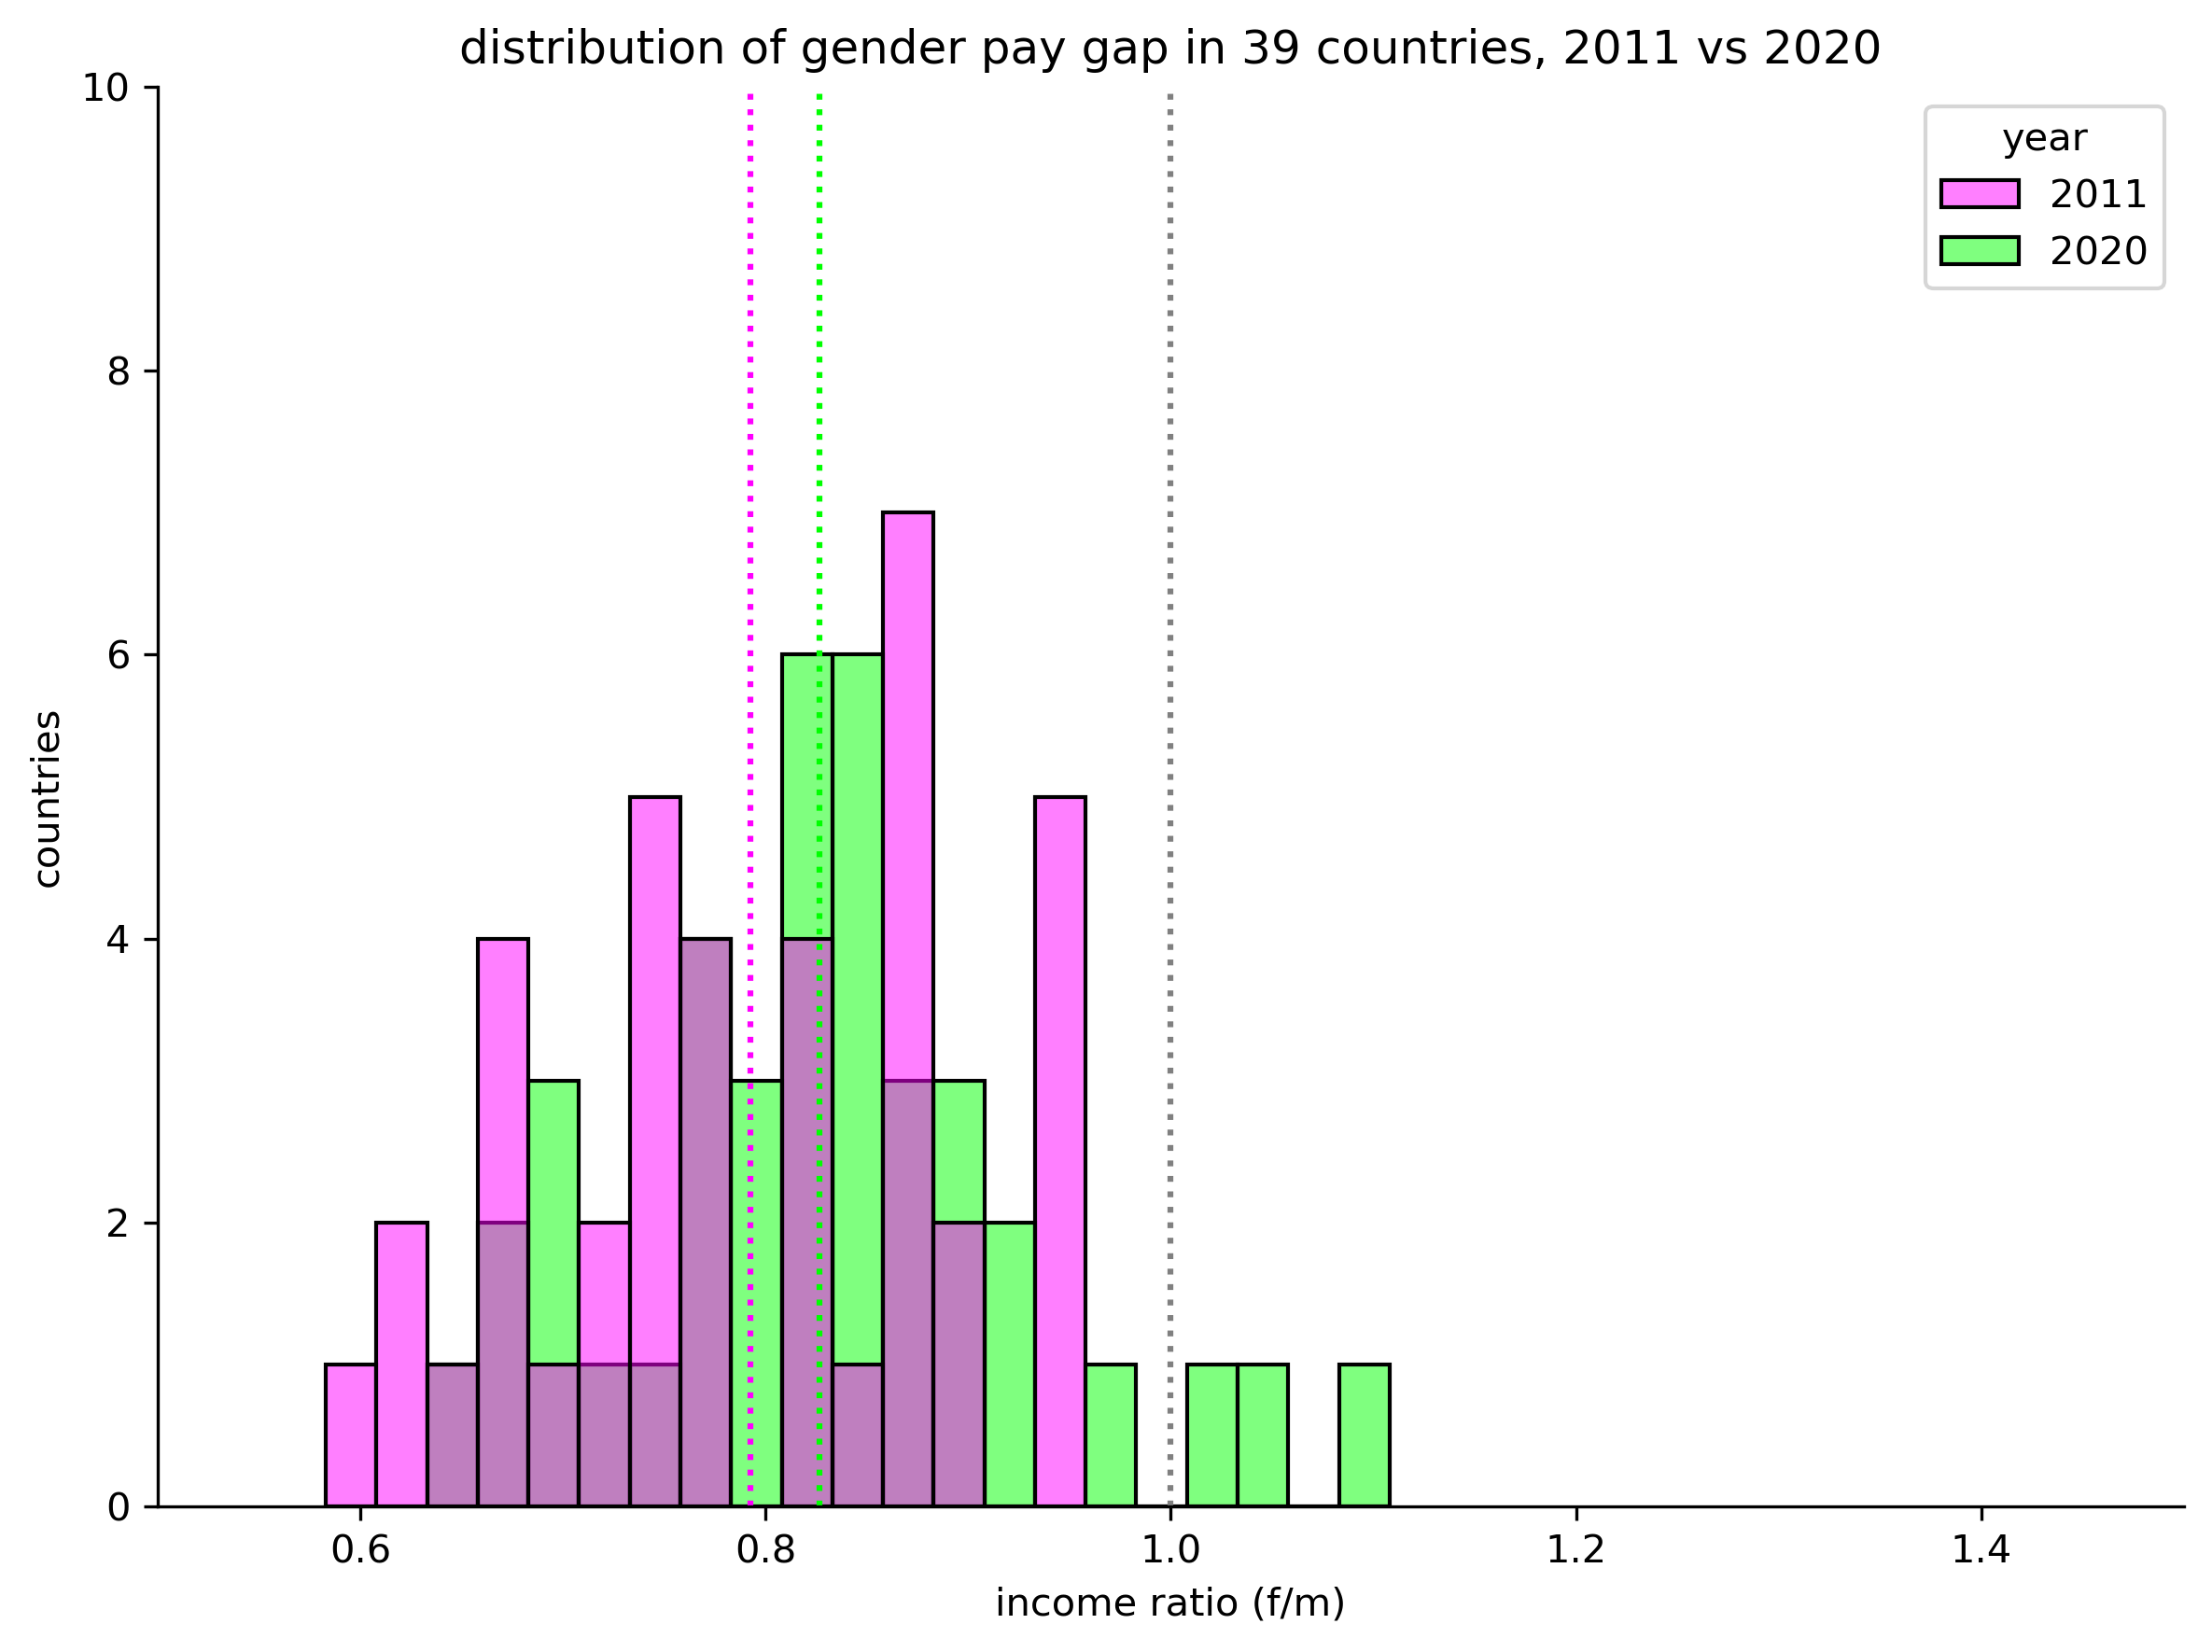

In [64]:
# distribution of total gender gap by country in 2011 v 2020 
# the gray reference line is where the mean of the f/m income ratio should be for gender pay parity (x=1)

pal = ['magenta','lime']

fig, g = plt.subplots(figsize=(8,6), dpi=300)
g = sns.histplot(data=total, x='income_ratio', hue='year', binwidth=0.025, palette=pal)
g.set(xlim=(0.5, 1.5), ylim=(0,10), yticks=[0,2,4,6,8,10], 
      xlabel='income ratio (f/m)', ylabel='countries', 
      title='distribution of gender pay gap in 39 countries, 2011 vs 2020')
g.axvline(total[total['year']==2011]['income_ratio'].mean(), color='magenta', ls='dotted')
g.axvline(total[total['year']==2020]['income_ratio'].mean(), color='lime', ls='dotted')
g.axvline(1, color='gray', ls='dotted')
sns.despine()
plt.tight_layout()
plt.savefig('f1_hist_2011_2020.png', bbox_inches='tight')
plt.show()

In [25]:
# how many of these 39 countries had equal pay laws in 2011 and 2020? 
# what were the income ratios? 

equal_pay = total.groupby(['year','equal_pay_law']).agg({'country':'count','income_ratio':np.mean}).reset_index()
equal_pay

,year,equal_pay_law,country,income_ratio
0,2011,No,13,0.844154
1,2011,Yes,26,0.766621
2,2020,No,8,0.868214
3,2020,Yes,31,0.816113


In [26]:
# at face value, the countries WITHOUT equal pay laws on average have better f/m income ratios 
# caveat: this is just looking at the 39 countries that we have data for both 2011 and 2020 
# achieving gender pay parity likely depends on more than one factor 

In [28]:
# which countries *still* don't mandate equal pay in 2020? 

no20 = total[(total['year']==2020) & (total['equal_pay_law']=='No')]
no20_sorted = no20.sort_values('income_ratio', ascending=False)
no20_sorted

,country,occupation,year,income_ratio,country_group,equal_pay_law,score
605,Panama,Total,2020,1.095840,Upper middle income,No,0
565,Malaysia,Total,2020,0.975032,Upper middle income,No,0
636,Singapore,Total,2020,0.926890,High income,No,0
520,Hungary,Total,2020,0.860119,High income,No,0
577,Mongolia,Total,2020,0.836660,Lower middle income,No,0
646,Slovakia,Total,2020,0.808533,High income,No,0
710,United States,Total,2020,0.779292,High income,No,0
537,Korea,Total,2020,0.663345,High income,No,0


In [29]:
# subset data for visualizing countries ranked by f/m income ratio in 2020 

total20 = total[total['year']==2020]
total20.shape

(39, 7)

In [30]:
total20.head()

,country,occupation,year,income_ratio,country_group,equal_pay_law,score
376,Argentina,Total,2020,0.776798,Upper middle income,Yes,1
387,Austria,Total,2020,0.699590,High income,Yes,1
396,Belgium,Total,2020,0.762129,High income,Yes,1
406,Bolivia,Total,2020,0.885229,Lower middle income,Yes,1
416,Bosnia and Herzegovina,Total,2020,0.849551,Upper middle income,Yes,1


In [31]:
total20 = total20.sort_values('income_ratio', ascending=False)
total20.head()

,country,occupation,year,income_ratio,country_group,equal_pay_law,score
605,Panama,Total,2020,1.095840,Upper middle income,No,0
426,Costa Rica,Total,2020,1.044029,Upper middle income,Yes,1
690,Thailand,Total,2020,1.031657,Upper middle income,Yes,1
565,Malaysia,Total,2020,0.975032,Upper middle income,No,0
627,Romania,Total,2020,0.928258,Upper middle income,Yes,1


In [32]:
# create custom palette 

custom_palette = []
for i in total20['equal_pay_law']: 
    if i == 'Yes': 
        custom_palette.append('dodgerblue')
    else: 
        custom_palette.append('red')

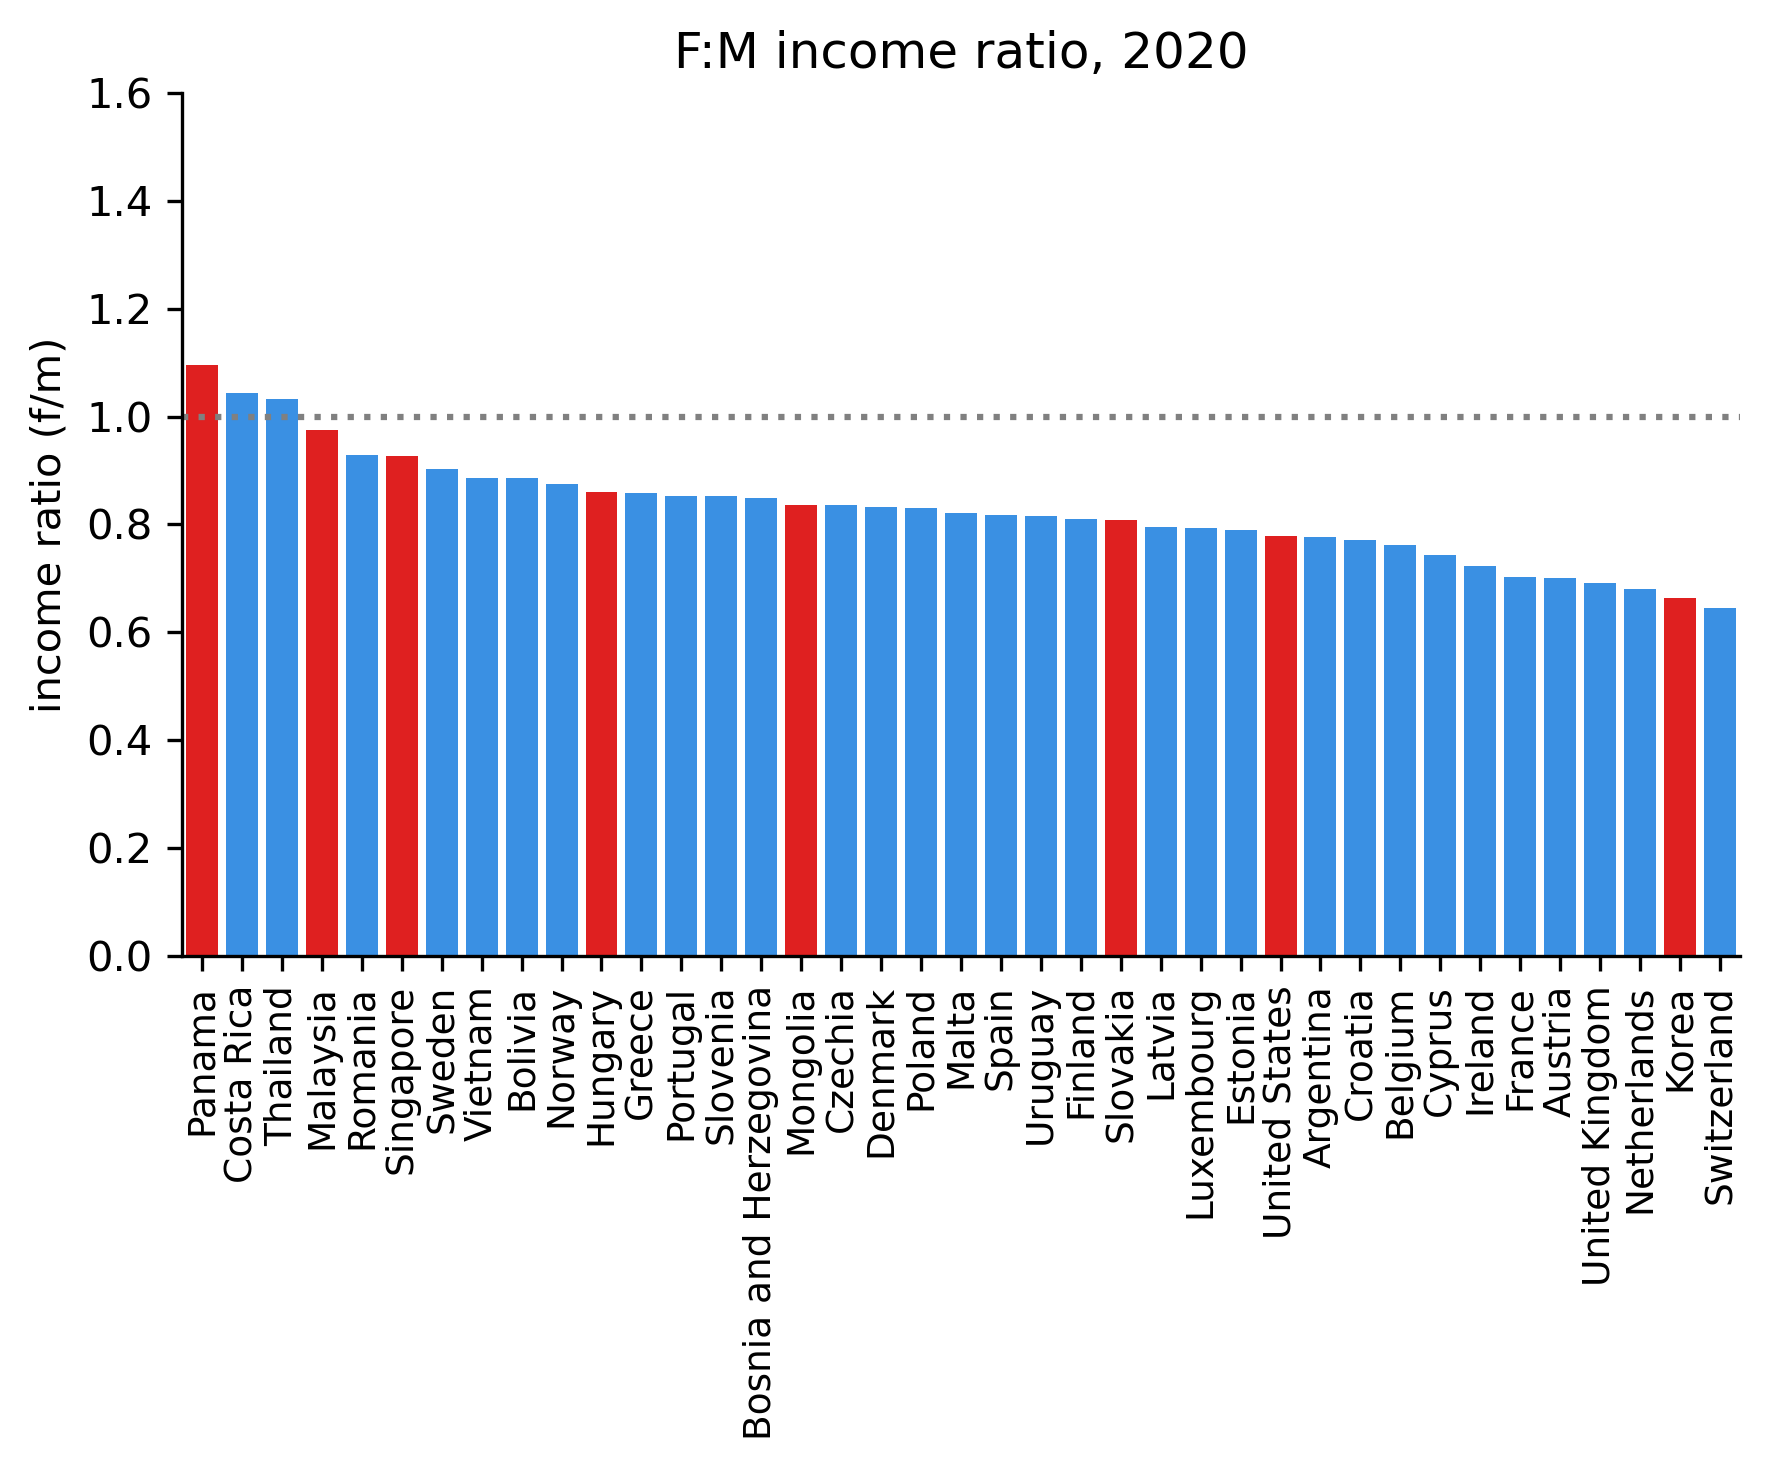

In [59]:
plt.subplots(figsize=(6,5), dpi=300)
g = sns.barplot(data=total20, x='country', y='income_ratio', palette=custom_palette)
g.set(title='F:M income ratio, 2020', xlabel='', 
      ylabel='income ratio (f/m)', ylim=(0,1.6))
sns.despine()
plt.axhline(1, color='gray', ls='dotted')
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.savefig('total_income_ratio_by_country_2020.png')
plt.show()

In [45]:
# I am not sure about some of these numbers 
# Per EU data (Eurostat, https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Gender_pay_gap_statistics)
# Switzerland's overall gender pay gap is 18.4% in 2022 
# It's unlikely that it would have jumped so much between 2020 and 2022 
# Unless the 2020 numbers were severely affected by COVID 
# I also don't know if data collection methods are the same between the EU numbers and the ILO numbers 
# On the other hand, the overall gender pay gap for Korea is consistent with OECD's data (around 32% in 2019)

# anyway I'm trying a different way to plot this data so it shows up better 

In [47]:
ratios = total20['income_ratio'].values
countries = total20['country'].values 
laws = total20['equal_pay_law'].values 